# Visualization

In [1]:
import matplotlib.pyplot as plt

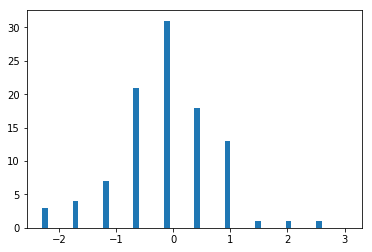

In [2]:
# 直方圖
normal_samples = np.random.normal(size=100) # 生成 100 組標準常態分配（平均值為 0，標準差為 1 的常態分配）隨機變數
plt.hist(normal_samples, width=0.1)
plt.show()

# Pandas

### 讀檔案

In [ ]:
data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

In [ ]:
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

In [ ]:
#依字元切割字串為list
data_split = data.split(",")

### 描述性統計

In [ ]:
df[object_features].mean()
df[object_features].max()

In [ ]:
# 各特徵之，樣本之相異值
df[object_features].nunique()

In [ ]:
#檢視資料中各個欄位類型的數量
app_train.dtypes.value_counts()

In [ ]:
#檢視資料中各"類別型欄位"類別(相異值)數量 ：百日馬拉松 -> Day 6
app_train.select_dtypes(include=["object"]).apply(pd.Series.nunique, axis = 0)

### DataFrame 處理

In [ ]:
#移除欄位
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)

In [ ]:
#合併df
df = pd.concat([df_train,df_test])

In [ ]:
# 秀出資料欄位的類型, 與對應的數量
# df.dtypes : 轉成以欄位為 index, 類別(type)為 value 的 DataFrame
# .reset_index() : 預設是將原本的 index 轉成一個新的欄位, 如果不須保留 index, 則通常會寫成 .reset_index(drop=True)
dtype_df = df.dtypes.reset_index() 
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

將 int, float object形態特徵抽出存於三個 list 中
：百日馬拉松 -> Day 7

In [ ]:
# 確定只有 int64, float64, object 三種類型後對欄位名稱執行迴圈, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
# .dtypes(欄位類型), .columns(欄位名稱) 是 DataFrame 提供的兩個方法, 這裡順便展示一下 for 與 zip 搭配的用法
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
# 這邊採用的寫法稱為 f-string, 是 Python 3.6.2 以後版本才出現的
# 如果無法執行, 則需要更新到這個版本之後, 或自行將程式改寫為 str.format 形式
# 改寫方式可以參考 https://blog.louie.lu/2017/08/08/outdate-python-string-format-and-fstring/
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

# Feature Engineering

In [3]:
#將左偏或右偏的數據轉成常態分布
train_Y = np.log1p(df_train['SalePrice'])

NameError: name 'df_train' is not defined

### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

### One Hot encoding

In [ ]:
sub_train = pd.get_dummies(sub_train) #針對 object(string)資料型態, 若為int就無作用

# Pandas

# Pandas

# Pandas

# Pandas